# How can we accurately predict the number of online food orders using machine learning models in Python, based on user demographics and historical ordering patterns?

In [3]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\sudents and projects\S6\Classification\Dataset (1).csv")

In [7]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [9]:
data.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


# DAV

In [14]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding to all relevant categorical columns
for col in ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']:
    data[col] = le.fit_transform(data[col])

In [16]:
data = data.drop('Unnamed: 12', axis=1)

In [18]:
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,12.9766,77.5993,560001,1,1
384,23,0,2,3,4,2,4,12.9854,77.7081,560048,1,1
385,22,0,2,3,4,2,5,12.9850,77.5533,560010,1,1
386,23,1,2,3,2,2,2,12.9770,77.5773,560009,1,1


In [20]:
X=data.drop('Output',axis=1)
y=data['Output']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [24]:
print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (310, 11)
Shape of test dataset :  (78, 11)


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8589743589743589
[[ 6  6]
 [ 5 61]]
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.91      0.92      0.92        66

    accuracy                           0.86        78
   macro avg       0.73      0.71      0.72        78
weighted avg       0.85      0.86      0.86        78



# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8974358974358975
[[ 6  6]
 [ 2 64]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.91      0.97      0.94        66

    accuracy                           0.90        78
   macro avg       0.83      0.73      0.77        78
weighted avg       0.89      0.90      0.89        78



# NB

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8333333333333334
Confusion Matrix:
 [[ 6  6]
 [ 7 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.50      0.48        12
           1       0.91      0.89      0.90        66

    accuracy                           0.83        78
   macro avg       0.68      0.70      0.69        78
weighted avg       0.84      0.83      0.84        78



# SUPPORT VECTOR MACHINE

In [38]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', random_state=42)  # 'rbf' is good for non-linear problems
svm_rbf.fit(X_train, y_train)

y_pred_svm = svm_rbf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))

SVM Accuracy: 0.8461538461538461
Confusion Matrix:
 [[ 0 12]
 [ 0 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.85      1.00      0.92        66

    accuracy                           0.85        78
   macro avg       0.42      0.50      0.46        78
weighted avg       0.72      0.85      0.78        78



# DECISION TREE

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8589743589743589
Confusion Matrix:
 [[ 7  5]
 [ 6 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.92      0.91      0.92        66

    accuracy                           0.86        78
   macro avg       0.73      0.75      0.74        78
weighted avg       0.86      0.86      0.86        78



# RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8846153846153846
Confusion Matrix:
 [[ 7  5]
 [ 4 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.93      0.94      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.88      0.88      0.88        78



# ADABOOST

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8846153846153846
Confusion Matrix:
 [[ 6  6]
 [ 3 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.91      0.95      0.93        66

    accuracy                           0.88        78
   macro avg       0.79      0.73      0.75        78
weighted avg       0.88      0.88      0.88        78



# Hyperparameter tuning with GridSearchCv

In [50]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best XGB Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best XGB Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best CV Score: 0.8903225806451612


In [52]:
# XGBOOST

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_xgb = XGBClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    eval_metric='logloss',
    random_state=42
)

best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)

print("Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))

Final XGBoost Accuracy: 0.8846153846153846
Confusion Matrix:
 [[ 9  3]
 [ 6 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.95      0.91      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.83      0.80        78
weighted avg       0.90      0.88      0.89        78



In [56]:
# ANN

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


# Build ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with number of features
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.4f}")

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.7550 - loss: 18674.6836 - val_accuracy: 0.7581 - val_loss: 4986.5879
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5752 - loss: 4128.0747 - val_accuracy: 0.7581 - val_loss: 307.0515
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7648 - loss: 1570.1603 - val_accuracy: 0.7581 - val_loss: 2510.1299
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7310 - loss: 1853.1968 - val_accuracy: 0.2419 - val_loss: 2151.4082
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5167 - loss: 1332.3549 - val_accuracy: 0.7581 - val_loss: 1852.6044
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7099 - loss: 1235.2395 - val_accuracy: 0.7581 - val_loss: 220.4478
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6620 - loss: 184.0677 - val_accuracy: 0.7581 - val_loss: 61.1295
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6489 - loss: 155.0627 -

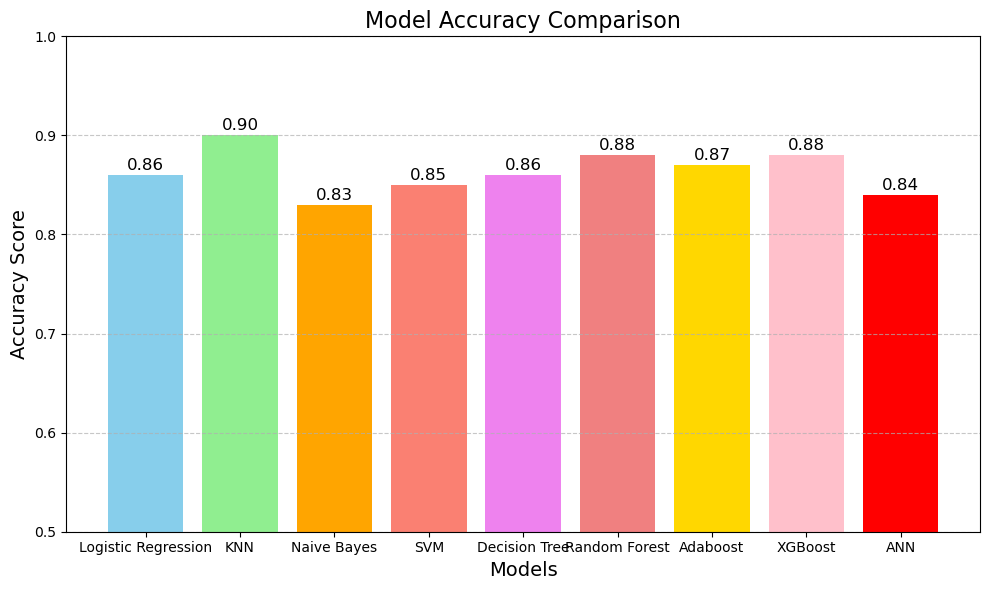

In [62]:
import matplotlib.pyplot as plt

# Accuracy scores
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes','SVM','Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost', 'ANN']
accuracy_scores = [0.86, 0.90, 0.83, 0.85, 0.86, 0.88, 0.87, 0.88, 0.84]

# Add a color for each model
colors = ['skyblue', 'lightgreen', 'orange', 'salmon', 'violet', 'lightcoral', 'gold', 'pink', 'red']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors)

# Add accuracy labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', fontsize=12)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0.5, 1.0)  # Adjusted to include ANN's score
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()